In [1]:
n <- 200
a <- 2
b <- 3
epsilon <- rnorm(n, 0, 1)

# Часть 1

$$y_{i} = a + b\,x_{i} ​+ ε_{i}​, \quad ε_{i}​ ∼ N(0,σ^2),\quad i=\overline{1,n}$$


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.65095 -0.79358  0.07287  0.71204  3.01563 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.92192    0.07573   25.38   <2e-16 ***
x            3.20311    0.09452   33.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.069 on 198 degrees of freedom
Multiple R-squared:  0.8529,	Adjusted R-squared:  0.8522 
F-statistic:  1148 on 1 and 198 DF,  p-value: < 2.2e-16


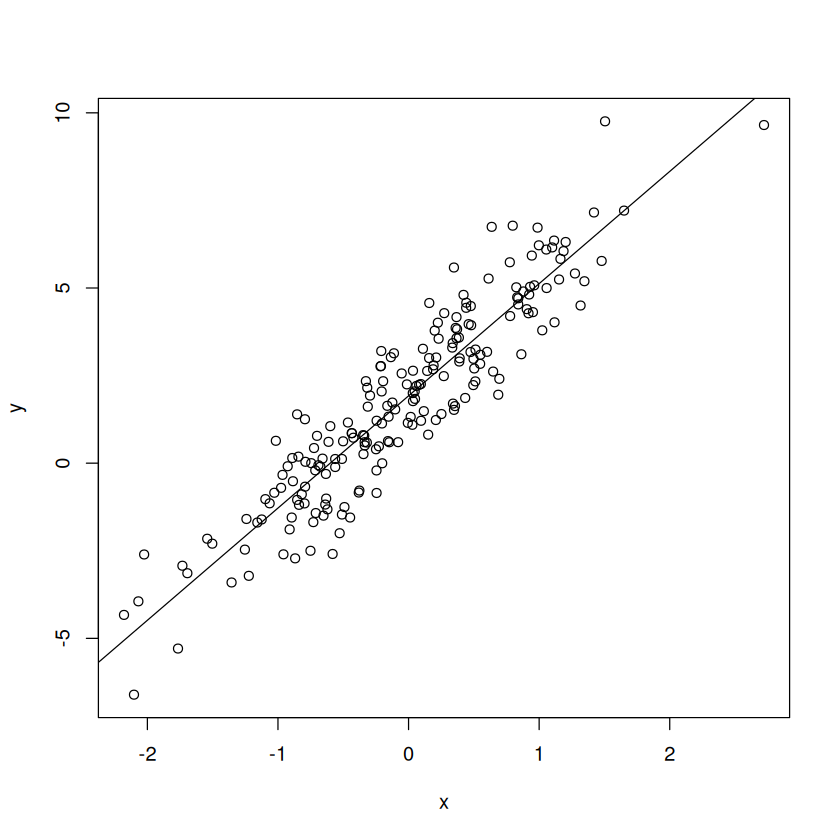

In [2]:
x <- rnorm(n, 0, .8)
y <- a + b * x + epsilon
plot(y~x)
summary(lm(y ~ x))
abline(lm(y ~ x))


Для случая `парной линейной регрессии`
$${\displaystyle {\hat {b}}={\frac {\sum _{t=1}^{n}x_{t}y_{t}}{\sum _{t=1}^{n}x_{t}^{2}}}}$$
$$ \hat{a} = \overline{y} + \hat{b}\,\overline{x} $$

In [3]:
b_est <- sum(x,y)/sum(x^2)
a_est <- mean(y) - b_est*mean(x)
a_est
b_est
y_est <- a_est+b_est*x

[1] 1.893497

[1] 2.654722

Коэффент детерминации <br>
$ R^{2} = 1 - \,\frac{RSS}{TSS} $ <br>
$ RSS = \sum{(y_{i}-\hat{y}_{i})^{2}}$ <br>
$ TSS = \sum{(y_{i}-\overline{y}_{i})^{2}}$

In [4]:
RSS <- sum((y-y_est)^2)
TSS <- sum((y-mean(y))^2)
R_2 <- 1- RSS/TSS
RSS
TSS
R_2

[1] 264.5872

[1] 1537.799

[1] 0.8279442

Гипотеза о о адкветности модели
$$ F = \frac{R^2}{1-R^2}\,(n-2)$$

In [5]:
F <- (R_2/(1-R_2))*(n-2)
F
qf(1 - .05, 1, n-2) #Крит значение статистики

[1] 952.7894

[1] 3.888853

Среднеквадратическая ошибка 
$$ S^2 = \frac{1}{n-2} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
Стандартная ошибка оценки 
$$ S = \sqrt{S^2}$$
Оценка дисперсии коэффициента наклона:
$$S^2_{b} = \frac{S^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$
Стандартная ошибка оценки коэффициента наклона SbSb​:
$$S_{b} = \sqrt{S^2_{b}}$$
Оценка дисперсии коэффициента сдвига
$$S^2_{a} = S^2 \cdot \frac{\bar{x}^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$
Стандартная ошибка оценки коэффициента сдвига
$$S_{a} = \sqrt{S^2_{a}}$$
t-статистика для коэффициента сдвига и наклона:
$$t = \frac{\text{оцененное значение коэффициента}}{\text{стандартная ошибка оценки коэффициента}}$$

In [6]:
S2 <- sum((y - y_est)^2) / (n - 2)
SE <- sqrt(S2)
S2_b <- S2 / sum((x - mean(x))^2)
SE_b <- sqrt(S2_b)
S2_a <- S2 * (mean(x^2)) / sum((x - mean(x))^2)
SE_a <- sqrt(S2_a)
t_value_a <- a_est / SE_a
t_value_b <- b_est / SE_b
t_value_a
t_value_b
qt(1 - .05/2, df = n - 2) #квантиль t распределения

[1] 23.11623

[1] 25.96602

[1] 1.972017

# Часть 2

$$y_{i} = a\,x_{i}^{b}\,ε_{i}​, \quad ln(ε_{i})​ ∼ N(0,σ^2),\quad i=\overline{1,n}$$

In [7]:
epsilon <- rlnorm(n, 0, .8)
i <- 1:n

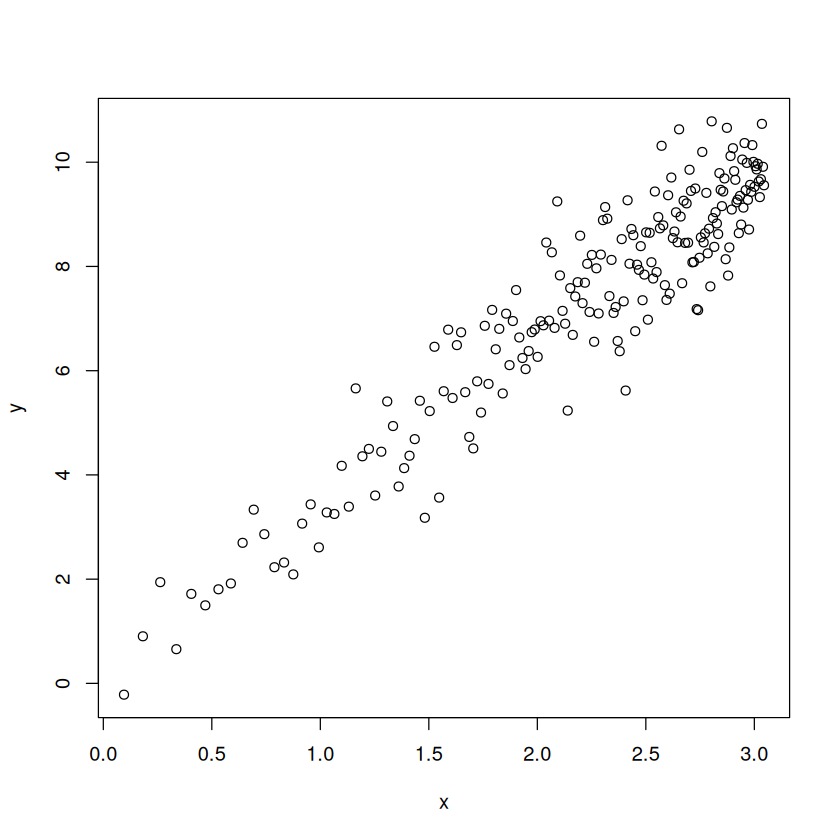

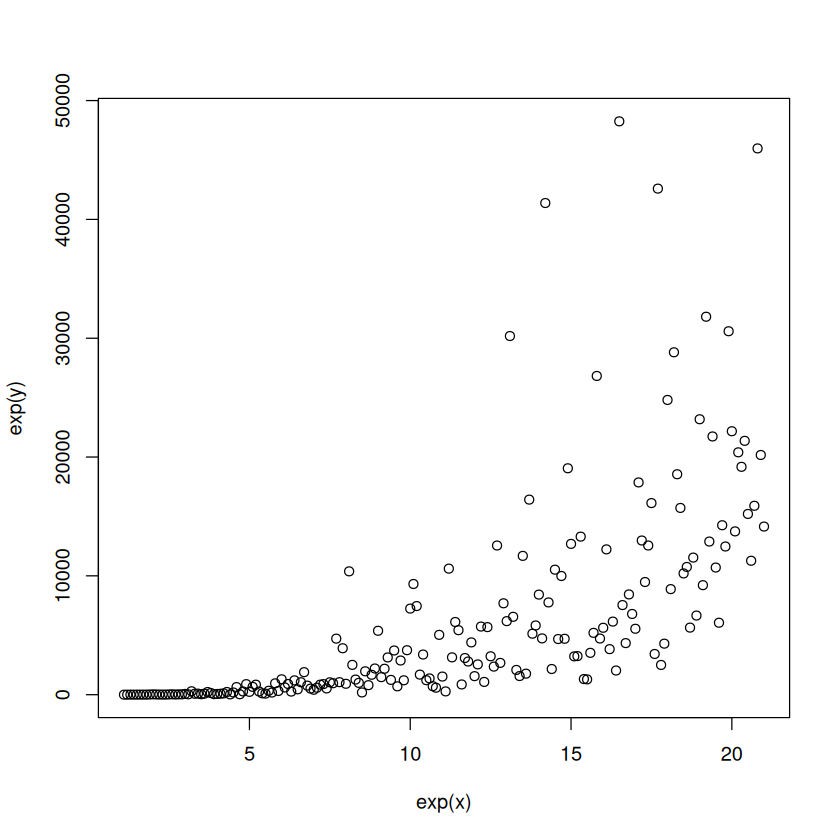

In [8]:
x <- 1+0.1*i
y <- a*(x^b)*epsilon
x <-log(x)
y <-log(y)
plot(y~x)
plot(exp(y)~exp(x))


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.29313 -0.47480 -0.01197  0.46888  2.31568 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.42699    0.18542   2.303   0.0223 *  
x            3.10961    0.08007  38.835   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8033 on 198 degrees of freedom
Multiple R-squared:  0.8839,	Adjusted R-squared:  0.8834 
F-statistic:  1508 on 1 and 198 DF,  p-value: < 2.2e-16


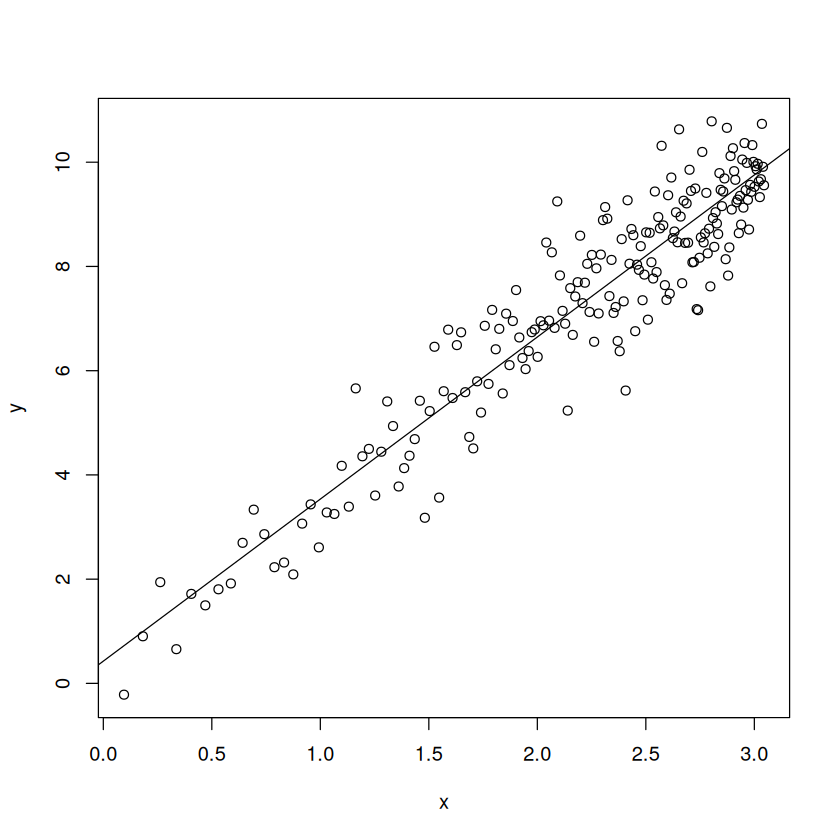

In [9]:
plot(y~x)
reg <- lm(y~x)
summary(reg)
abline(reg)

`summary(reg)` выведет значения для линейной модели. Необходимо `exp(Коэффиценты)` 

In [10]:
exp(reg$coefficients)

(Intercept)           x 
   1.532636   22.412206

In [11]:
b_est <- sum(x,y)/sum(x^2)
a_est <- mean(y) - b_est*mean(x)
a_est
b_est

[1] 3.382098

[1] 1.769007

In [12]:
y_est <- a_est+b_est*x
RSS <- sum((y-y_est)^2)
TSS <- sum((y-mean(y))^2)
R_2 <- 1- RSS/TSS
RSS
TSS
R_2

[1] 308.6536

[1] 1100.988

[1] 0.7196576

In [13]:
F <- (R_2/(1-R_2))*(n-2)
F
qf(1 - .05, 1, n-2) #Крит значение статистики

[1] 508.2793

[1] 3.888853

In [14]:
S2 <- sum((y - y_est)^2) / (n - 2)
SE <- sqrt(S2)
S2_b <- S2 / sum((x - mean(x))^2)
SE_b <- sqrt(S2_b)
S2_a <- S2 * (mean(x^2)) / sum((x - mean(x))^2)
SE_a <- sqrt(S2_a)
t_value_a <- a_est / SE_a
t_value_b <- b_est / SE_b
t_value_a
t_value_b
qt(1 - .05/2, df = n - 2) #квантиль t распределения

[1] 11.73569

[1] 14.21432

[1] 1.972017

# Часть 3

$$y_{i} = a\,e^{b\,x_{i}}\,ε_{i}​, \quad ln(ε_{i})​ ∼ N(0,σ^2),\quad i=\overline{1,n}$$

In [15]:
epsilon <- rlnorm(n, 0, .8)
i <- 1:n

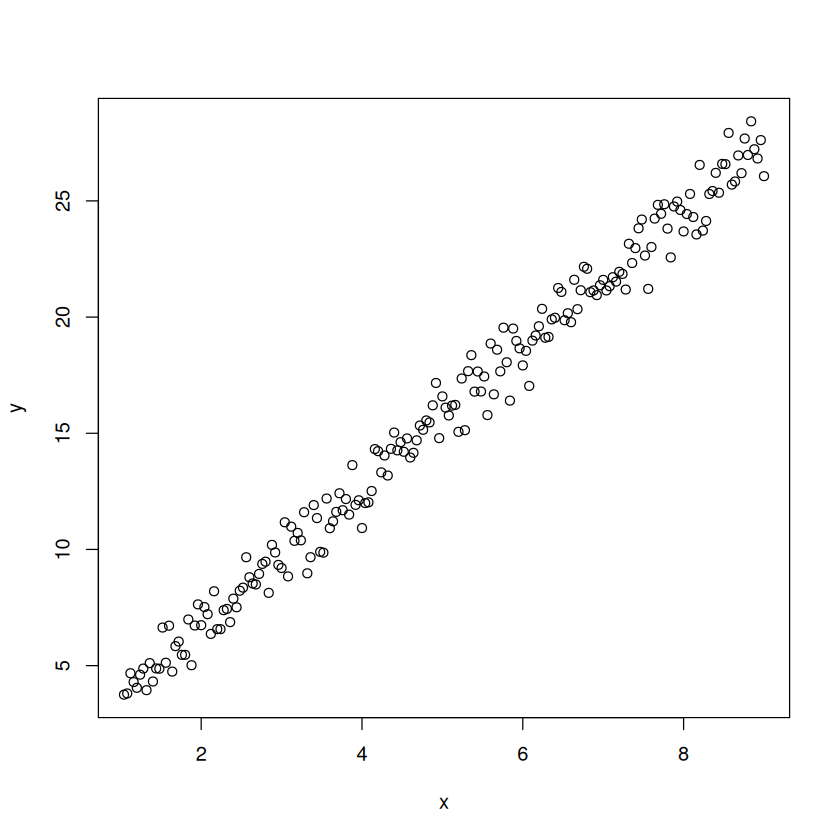

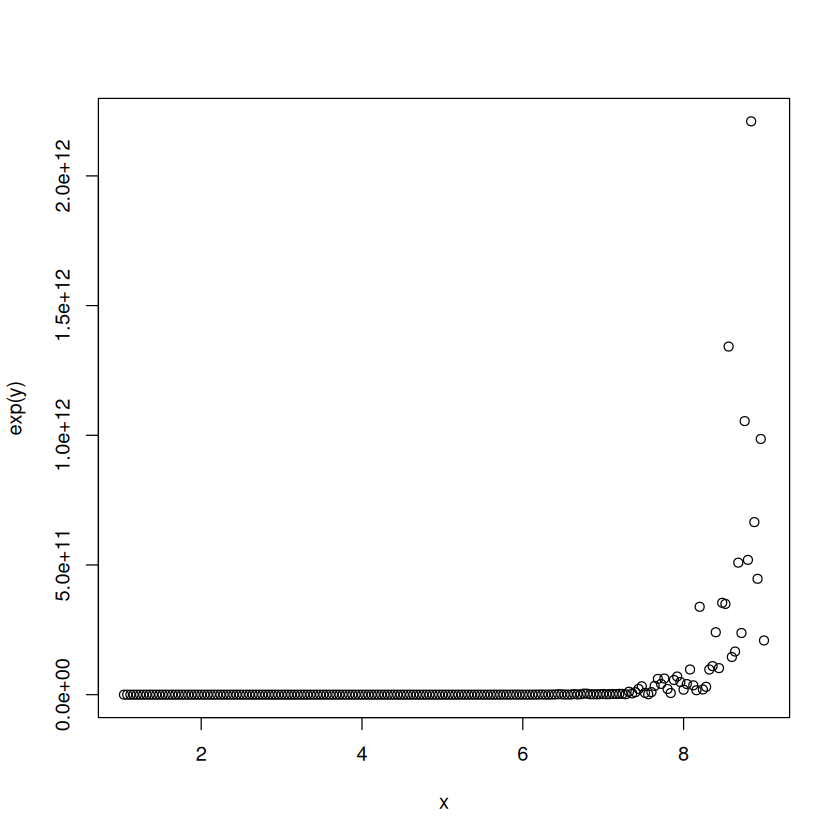

In [16]:
x <- 1 + .04 * i
y <- a * exp(b * x) * epsilon

y <- log(y)

plot(y ~ x)
plot(exp(y) ~ x)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.07963 -0.52553 -0.01376  0.54670  1.72863 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.79525    0.13472   5.903 1.53e-08 ***
x            2.97582    0.02438 122.057  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7963 on 198 degrees of freedom
Multiple R-squared:  0.9869,	Adjusted R-squared:  0.9868 
F-statistic: 1.49e+04 on 1 and 198 DF,  p-value: < 2.2e-16


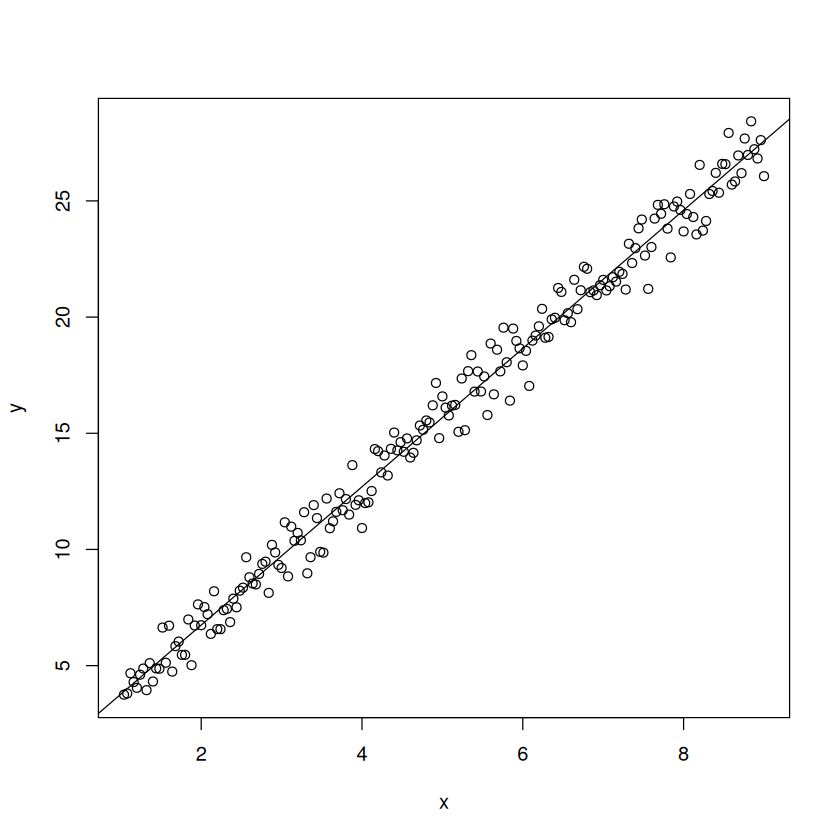

In [17]:
plot(y~x)
reg <- lm(y~x)
summary(reg)
abline(reg)

`summary(reg)` выведет значения для линейной модели. Необходимо `exp(Коэффиценты)` 

In [18]:
exp(reg$coefficients[1])

(Intercept) 
   2.214986

In [19]:
b_est <- sum(x,y)/sum(x^2)
a_est <- mean(y) - b_est*mean(x)
a_est
b_est

[1] 12.32175

[1] 0.6797061

In [20]:
y_est <- a_est+b_est*x
RSS <- sum((y-y_est)^2)
TSS <- sum((y-mean(y))^2)
R_2 <- 1- RSS/TSS
RSS
TSS
R_2

[1] 5749.024

[1] 9571.189

[1] 0.3993407

In [21]:
F <- (R_2/(1-R_2))*(n-2)
F
qf(1 - .05, 1, n-2) #Крит значение статистики

[1] 131.6378

[1] 3.888853

In [22]:
S2 <- sum((y - y_est)^2) / (n - 2)
SE <- sqrt(S2)
S2_b <- S2 / sum((x - mean(x))^2)
SE_b <- sqrt(S2_b)
S2_a <- S2 * (mean(x^2)) / sum((x - mean(x))^2)
SE_a <- sqrt(S2_a)
t_value_a <- a_est / SE_a
t_value_b <- b_est / SE_b
t_value_a
t_value_b
qt(1 - .05/2, df = n - 2) #квантиль t распределения

[1] 13.51537

[1] 4.119701

[1] 1.972017

# Часть 4

$$y_{i} = a+\,b\,ln(x_{i})\,+\,ε_{i}​, \quad ε_{i} ∼ N(0,σ^2),\quad i=\overline{1,n}$$

In [23]:
epsilon <- rnorm(n, 0, .8)
i <- 1:n

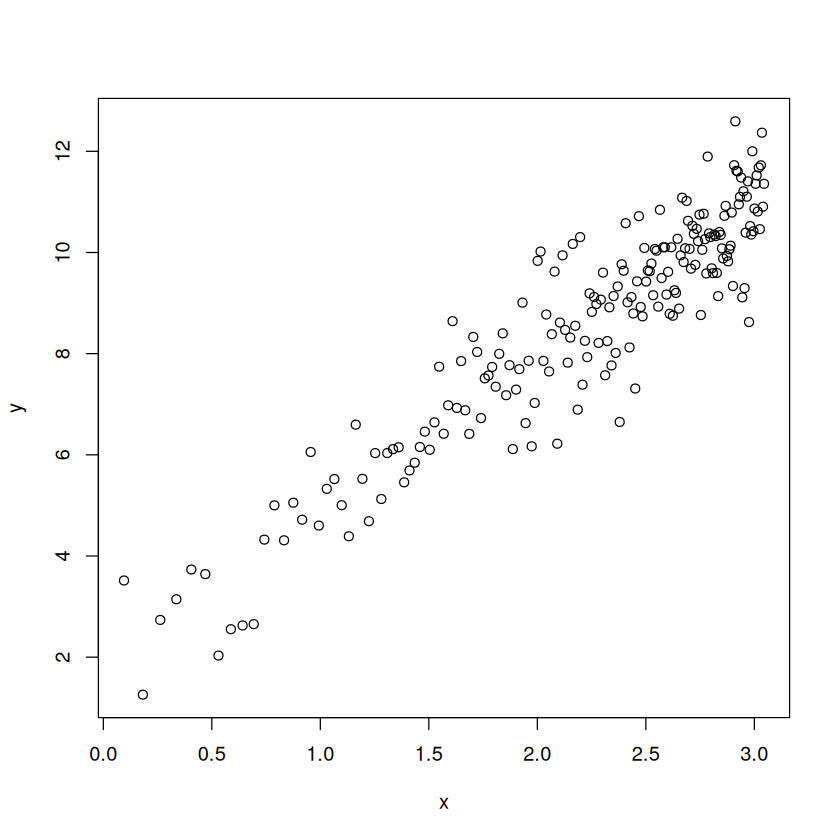

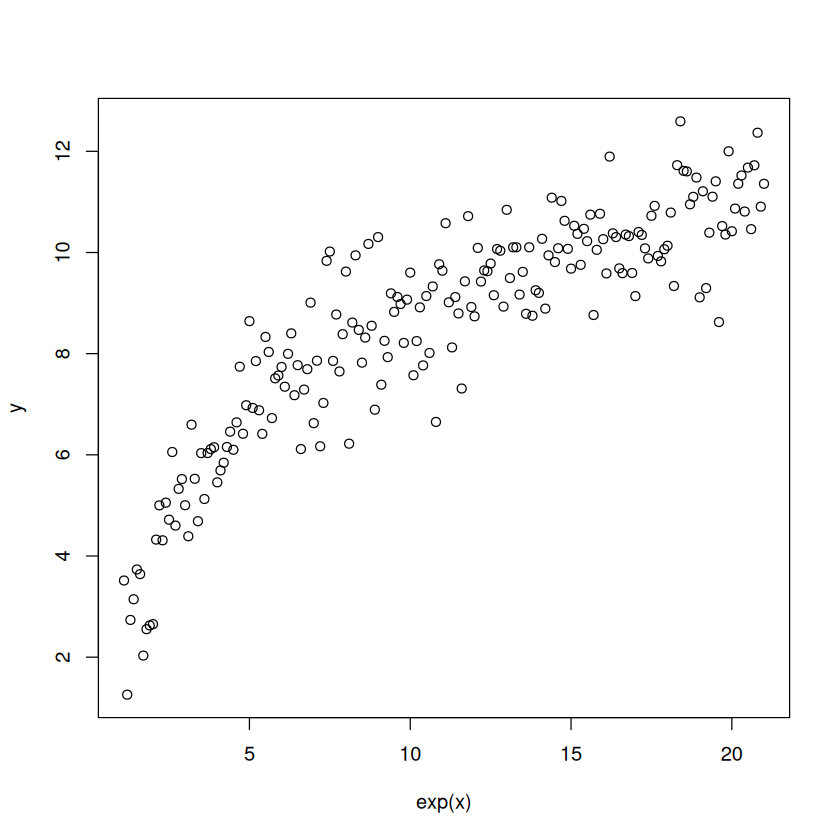

In [24]:
x <- 1 + .1 * i
y <- a + b*log(x) + epsilon
x <- log(x)

plot(y ~ x)
plot(y ~ exp(x))


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.41510 -0.51328  0.04217  0.43842  2.04285 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.95569    0.19176   10.20   <2e-16 ***
x            2.98777    0.08281   36.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8308 on 198 degrees of freedom
Multiple R-squared:  0.868,	Adjusted R-squared:  0.8673 
F-statistic:  1302 on 1 and 198 DF,  p-value: < 2.2e-16


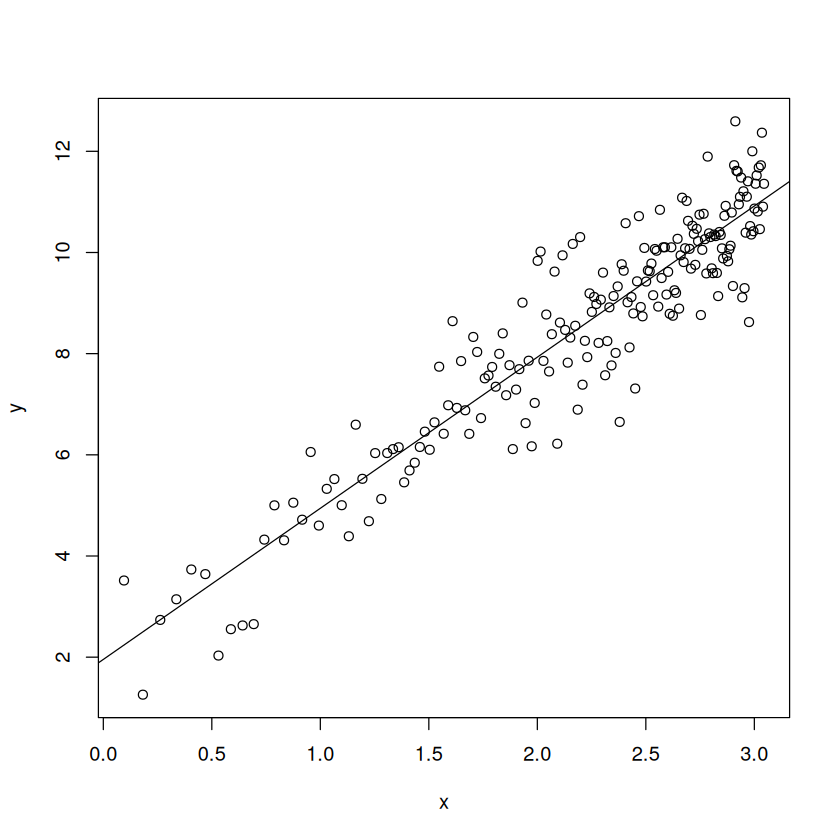

In [25]:
plot(y~x)
reg <- lm(y~x)
summary(reg)
abline(reg)

# Часть 5

$$y_{i} = a+\, \frac{b}{x_{i}}\,+\,ε_{i}​, \quad ε_{i} ∼ N(0,σ^2),\quad i=\overline{1,n}$$

In [26]:
a <- .8
b <- 20

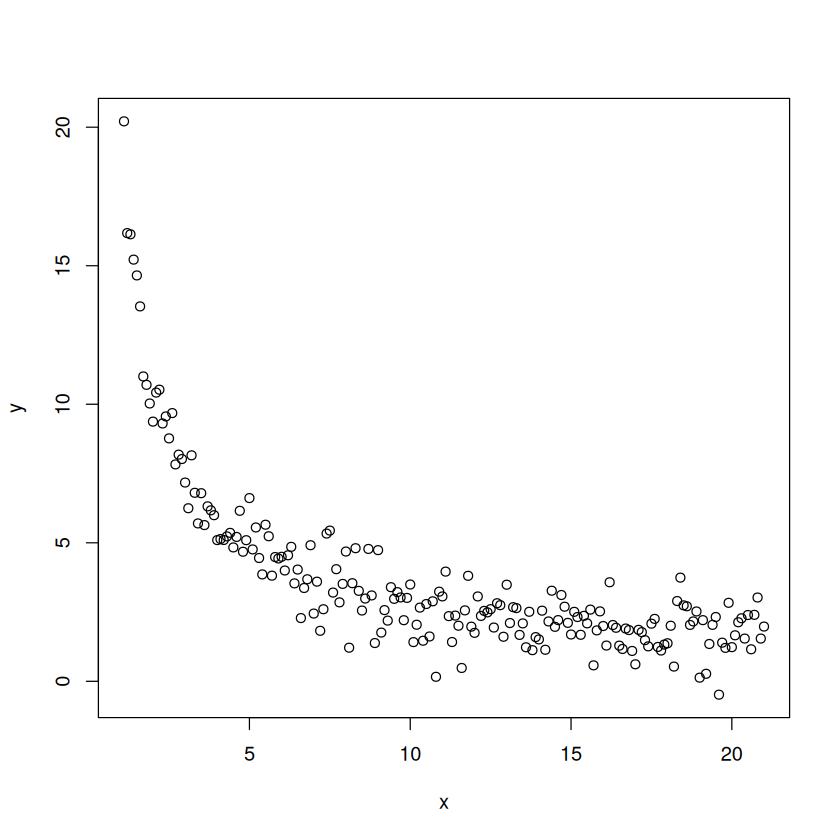

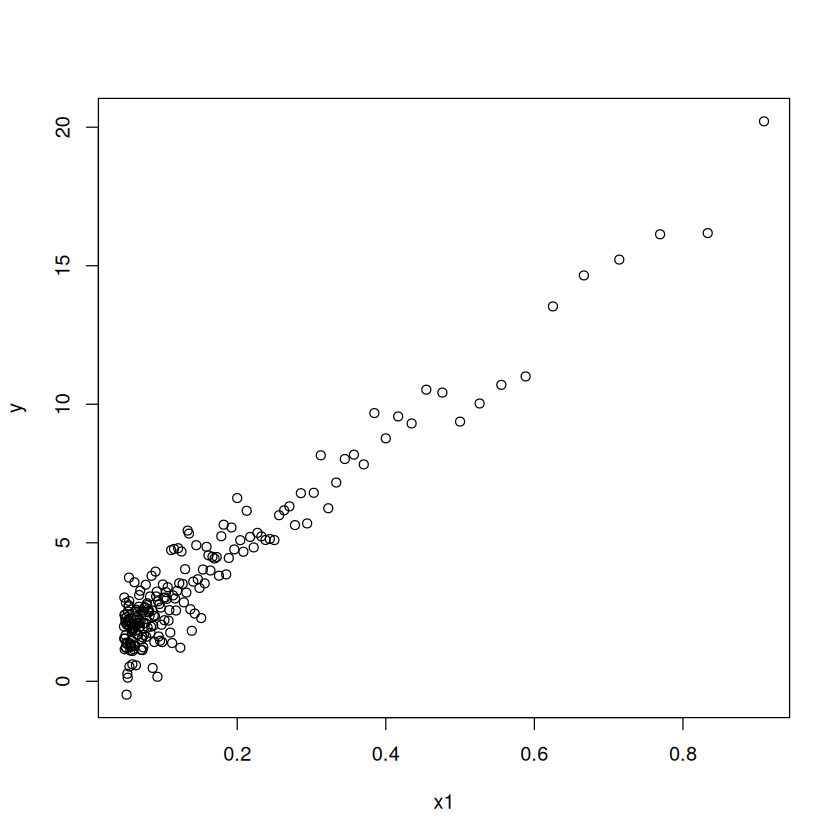

In [27]:
x <- 1 + .1 * i

y <- a + b/x + epsilon

x1 <- 1/x
# Использую новую перменную,не полчается переопределить изначальную. 
# Из за формата хранения числа в компьютере?
plot(y ~ x)
plot(y ~ x1)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.42046 -0.52514  0.05264  0.43004  2.04424 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.73716    0.08282     8.9 3.55e-16 ***
x1          19.94384    0.38954    51.2  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8308 on 198 degrees of freedom
Multiple R-squared:  0.9298,	Adjusted R-squared:  0.9294 
F-statistic:  2621 on 1 and 198 DF,  p-value: < 2.2e-16


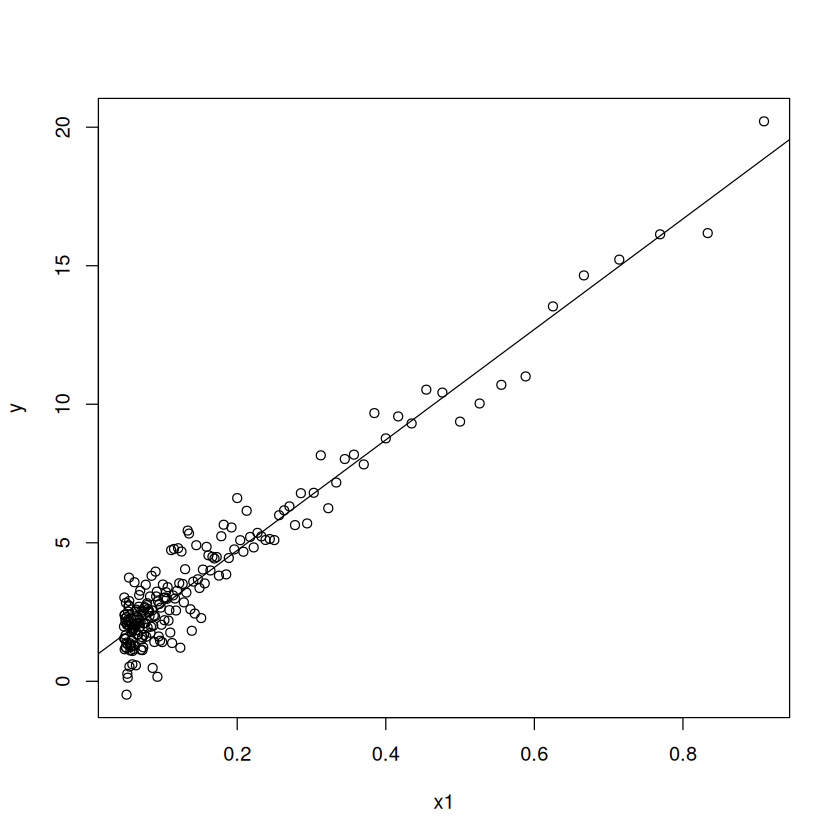

In [28]:
plot(y~x1)
reg <- lm(y~x1)
summary(reg)
abline(reg)